In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go # 그래프 객체 생성
from plotly.subplots import make_subplots
import datetime
import seaborn as sns 
import scipy.stats
import plotly.express as px
import os 
from scipy import stats
from sklearn import metrics
import statsmodels.formula.api as smf
import scipy.stats as st
import pylab
import csv

os.getcwd()

'c:\\Users\\seong\\Desktop\\Enittproj\\Enitt'

In [2]:
## merge 1, 2 데이터
data1 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A463. 전북대 New REC 발전량.csv", encoding="ms949")
data2 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/463. 전북대NewREC 발전량.csv", encoding="ms949")
data3 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A463. 전북대 New REC 환경센서.csv", encoding="ms949")
data4 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/463. 전북대NewREC 환경정보.csv", encoding="ms949")



data_12 = pd.concat([data2, data1])
data_34 = pd.concat([data4, data3])
ent_data_solar = data_12.reset_index().drop('index', axis=1)
ent_data_solar

ent_data_weather = data_34.reset_index().drop('index', axis=1)
ent_data_weather

,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-11-19,15:13:12,289,443,21.2,14.6
1,2,2018-11-19,15:14:04,288,441,21.2,14.8
2,3,2018-11-19,15:14:56,284,436,21.2,14.8
3,4,2018-11-19,15:15:48,282,432,21.2,14.9
4,5,2018-11-19,15:16:40,281,431,20.8,14.9
...,...,...,...,...,...,...,...
723073,723074,2020-10-22,23:33:48,0,0,10.3,11.3
723074,723075,2020-10-22,23:34:46,0,0,10.3,11.4
723075,723076,2020-10-22,23:35:43,0,0,10.3,11.4
723076,723077,2020-10-22,23:36:41,0,0,10.4,11.4


In [3]:
## 파일불러오기 ( 추가데이터 포함되어 있는 것은 제외 )
# def ent_loadfile(solar_path, weather_path):
#     ent_data_solar = pd.read_csv(solar_path)
#     ent_data_weather = pd.read_csv(weather_path)

#     return ent_data_solar, ent_data_weather


# ent_data_solar, ent_data_weather = ent_loadfile(
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 발전량.csv", 
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 환경센서.csv")

# ent_data_solar["pow_date"].unique() ## 약 2018-11-26~ 2020-03-02 
# ent_data_weather["env_date"].unique() ## 약 2018-11-26 ~ 2020-03-03  

# -> low data인 환경정보로 정리 필요 // 

## 외부데이터 불러오기 
def other_loadfile(a, b, c): ## 임의로 수정 필요 
    other_data_dummy1 = pd.read_csv(a, encoding="ms949")
    other_data_dummy2 = pd.read_csv(b, encoding="ms949")
    other_data_dummy3 = pd.read_csv(c, encoding="ms949")

    return other_data_dummy1, other_data_dummy2, other_data_dummy3

other_data_dummy1, other_data_dummy2, other_data_dummy3 = other_loadfile(
    "./ENITT_SOLAR_DATA/re_allweather/allweather2018.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2019.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2020.csv")


other_data_dummyall = other_data_dummy1.merge(other_data_dummy2, how="outer").merge(other_data_dummy3, how="outer")
other_data_weather = other_data_dummyall[other_data_dummyall["지점명"] == "목포"]
other_data_weather["지점명"].unique()

other_data_dummy1 = pd.read_csv("./ENITT_SOLAR_DATA/otherdata/otherdata.csv", encoding="ms949")
other_data_solar = other_data_dummy1[other_data_dummy1["발전기명"] == "안산연성정수장태양광"]
other_data_solar["발전기명"].unique()
# 2019-06-16 13:00
# ent_data_weather.loc[ent_data_weather["env_date"] == "2019-06-16"]

# print()
ent_data_solar1 = ent_data_solar[ent_data_solar["pow_id"] == 1]
ent_data_weather


,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-11-19,15:13:12,289,443,21.2,14.6
1,2,2018-11-19,15:14:04,288,441,21.2,14.8
2,3,2018-11-19,15:14:56,284,436,21.2,14.8
3,4,2018-11-19,15:15:48,282,432,21.2,14.9
4,5,2018-11-19,15:16:40,281,431,20.8,14.9
...,...,...,...,...,...,...,...
723073,723074,2020-10-22,23:33:48,0,0,10.3,11.3
723074,723075,2020-10-22,23:34:46,0,0,10.3,11.4
723075,723076,2020-10-22,23:35:43,0,0,10.3,11.4
723076,723077,2020-10-22,23:36:41,0,0,10.4,11.4


In [4]:
## DELETE COLUMN AND EDIT COLUMN

## '지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '10cm 지중온도(°C)'
#=>

## '기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '전운량', '지면온도'
reset_other_weather = other_data_weather.set_index("일시")
reset_other_weather_need = reset_other_weather[['기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '10cm 지중온도(°C)']]
reset_other_weather_need.columns = ['기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '적설', '전운량', '지중온도']
reset_other_weather_need.fillna(0, inplace=True)
reset_other_weather_need



,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도
일시,,,,,,,,,,
2018-01-01 00:00,2.3,0.0,1.7,340.0,84.0,0.0,0.0,0.0,8.0,5.2
2018-01-01 01:00,2.3,0.0,2.4,20.0,89.0,0.0,0.0,0.0,0.0,5.1
2018-01-01 02:00,1.9,0.0,1.8,20.0,79.0,0.0,0.0,0.0,0.0,5.0
2018-01-01 03:00,1.6,0.0,2.1,20.0,82.0,0.0,0.0,0.0,5.0,4.9
2018-01-01 04:00,1.4,0.0,1.9,20.0,78.0,0.0,0.0,0.0,7.0,4.8
...,...,...,...,...,...,...,...,...,...,...
2020-10-31 19:00,15.9,0.0,2.7,180.0,60.0,0.0,0.0,0.0,10.0,16.3
2020-10-31 20:00,14.8,0.0,2.4,160.0,64.0,0.0,0.0,0.0,4.0,16.1
2020-10-31 21:00,14.0,0.0,3.3,140.0,66.0,0.0,0.0,0.0,6.0,15.8


In [63]:
## 기업 solar weather EDA -> 필요
ent_data_weather.columns 

# ent_data_weather["env_levelsolar"].describe()
# ent_data_weather["env_slopesolar"].describe()


## 기업 날씨 데이터 1시간 별로 groupby , ( slopesolar, levelsolar => sum) , ( modtemp, airtemp => mean )
def groupby_weather():
    ## time 구분
    dummy_time_list = []
    for i in ent_data_weather["env_time"]:
        dummy_time_list.append(i[:2])

    ent_data_weather["dummy_time"] = dummy_time_list
    dummy_groupbyall = ent_data_weather.groupby(["env_date", "dummy_time"]).mean()
    ent_data_weather_groupby = dummy_groupbyall.reset_index() ## 그룹화된 인덱스 풀기 

    ### 발전량이 거의 없는 데이터 삭제 ( 9~ 19 까지만 살린다)
    drop_data = ent_data_weather_groupby.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08", "19", "20", "21", "22", "23"]})
    ent_data_weather_sort = ent_data_weather_groupby[~drop_data].dropna()
    # print(ent_data_weather_sort)
    ent_data_weather_sort.drop("env_index", axis=1, inplace=True)

    return ent_data_weather_sort




## 기업 발전량 데이터 groupby
def groupby_solar():
    ## 필요한 컬럼만 가져오기
    ent_data_need = ent_data_solar1[["pow_date", "pow_time", "pow_totpower"]]

    ## time 구분
    dummy_time_list = []
    for i in ent_data_need["pow_time"]:
        dummy_time_list.append(i[:2])
    ent_data_need["dummy_time"] = dummy_time_list

    dummy_groupby1 = ent_data_need.groupby(["pow_date", "dummy_time"]).min()
    dummy_groupby2 = ent_data_need.groupby(["pow_date", "dummy_time"]).max()

    ## 최대값과 최솟값 차 = 1시간동안 발전한 총용량
    ## 최대값과 최솟값이 같을 경우 = 발전량 0 or 그 시간대 총발전량이 1개밖에 없어 비교 불가능한 경우
    ent_data_perhour = dummy_groupby2["pow_totpower"] - dummy_groupby1["pow_totpower"]
    ent_data_perhour = ent_data_perhour.reset_index()

    ### 발전량이 거의 없는 데이터 삭제 ( 8~ 19 까지만 살린다)
    drop_data = ent_data_perhour.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08","09", "10","11","12","13","15", "16", "17", "18", "19", "20", "21", "22", "23"]})
    ent_data_perhour_sort = ent_data_perhour[~drop_data].dropna()

    return ent_data_perhour_sort
    # print(ent_data_perhour_sort["dummy_time"].unique())

def groupby_solar_reset():
    ## 필요한 컬럼만 가져오기
    ent_data_need = ent_data_solar1[["pow_date", "pow_time", "pow_dcv", "pow_dca"]]

    ## time 구분
    dummy_time_list = []
    for i in ent_data_need["pow_time"]:
        dummy_time_list.append(i[:2])
    ent_data_need["dummy_time"] = dummy_time_list

    ent_data_need["watt"] = ent_data_need["pow_dcv"] * ent_data_need["pow_dca"]

    ## RESET 발전량 :: 직류 전압 X 직류 전류 : 발전량 ,, GROUPBY해서 직류X전류 의 평균량으로 구한다
    ent_data_perhour = ent_data_need.groupby(["pow_date", "dummy_time"]).mean()
    ent_data_perhour = ent_data_perhour.reset_index()


    drop_data = ent_data_perhour.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08","09", "10","11","12","13", "14","15", "17", "18", "19", "20", "21", "22", "23"]})
    ent_data_perhour_sort = ent_data_perhour[~drop_data].dropna()

    return ent_data_perhour_sort



### weather, solar join
def join_weather_solar(a, b):
    sub_index1 = a["env_date"] + " " + a["dummy_time"] + ":00"
    a.index = sub_index1

    sub_index2 = b["pow_date"] + " " + b["dummy_time"] + ":00"
    b.index = sub_index2

    joinset = a.join(b[["pow_dcv", "pow_dca", "watt" ]])
    ent_data_solar_weather = joinset.dropna()


    return ent_data_solar_weather

ent_data_weather_sort = groupby_weather()
ent_data_perhour_sort = groupby_solar_reset()
ent_data_solar_weather = join_weather_solar(ent_data_weather_sort, ent_data_perhour_sort)
ent_data_solar_weather
# pow_perhour 
# sns.boxplot(ent_data_weather_sort["env_slopesolar"])
# sns.boxplot(ent_data_weather_sort["env_levelsolar"])
# sns.boxplot(data = ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]])
# ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]]

# print(len(joinset) - 2504)


,env_date,dummy_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt
2018-11-19 16:00,2018-11-19,16,72.434783,114.275362,11.605797,10.982609,148.144928,1.752174,272.220290
2018-11-20 16:00,2018-11-20,16,91.971014,168.260870,12.513043,11.269565,147.538462,1.846154,285.201923
2018-11-21 16:00,2018-11-21,16,22.826087,24.971014,7.781159,7.646377,124.202899,0.392754,50.895652
2018-11-22 16:00,2018-11-22,16,31.101449,35.695652,5.320290,5.695652,127.420290,0.595652,81.150725
2018-11-23 16:00,2018-11-23,16,77.257143,131.257143,7.430000,6.848571,149.276596,1.878723,296.036170
...,...,...,...,...,...,...,...,...,...
2020-10-18 16:00,2020-10-18,16,36.166667,33.500000,14.816667,15.500000,144.833333,0.766667,111.100000
2020-10-19 16:00,2020-10-19,16,57.500000,53.500000,15.850000,16.200000,146.000000,1.100000,160.600000
2020-10-20 16:00,2020-10-20,16,196.615385,163.338462,20.053846,17.386154,151.461538,3.023077,456.167692
2020-10-21 16:00,2020-10-21,16,19.966667,22.266667,13.516667,13.963333,121.000000,0.421667,51.021667


In [64]:
## 기업, 공공 join

join_ent_other = ent_data_solar_weather.join(reset_other_weather_need)
join_ent_other["일사"].fillna(0, inplace=True)
# join_ent_other
join_ent_other["match_solar"] = join_ent_other["일사"] * 1000000 / 3600
join_ent_other_set = join_ent_other.drop(["env_date", "dummy_time"], axis=1)

## csv로 저장
join_ent_other_set.to_csv('NewREC1_join.csv', encoding='utf-8')


2.165264216008612
-1.3963978041320764


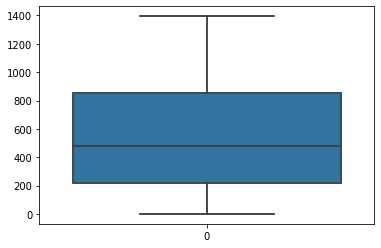

In [65]:
## 이상치 제거

sns.boxplot(data = join_ent_other_set["watt"])


import pandas as pd
from scipy import stats

# deleteoutlier = stats.zscore(join_ent_other_set["watt"])
# deleteoutlier
deleteoutlier = stats.zscore(join_ent_other_set["watt"])
join_ent_other_set["z_score"] = deleteoutlier

join_ent_other_del = join_ent_other_set.loc[join_ent_other_set['z_score'].abs()<=3]
sns.boxplot(data = join_ent_other_del["watt"])
print(join_ent_other_del['z_score'].max())
print(join_ent_other_del['z_score'].min())

## 다시저장
join_ent_other_del.to_csv('NewREC1_join.csv', encoding='utf-8')


In [66]:
join_ent_other_del.describe()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar,z_score
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,217.353645,211.395953,20.431963,16.480353,146.345918,3.701236,546.728564,17.902386,0.244732,4.650696,244.294235,62.920477,0.622465,1.303936,0.015308,5.691849,17.883698,362.204550,-6.345708e-17
std,148.505799,157.827615,11.648357,9.348701,10.087054,2.667078,391.917577,9.133213,2.133327,2.081888,121.728295,15.565107,0.430501,0.738725,0.200855,3.508452,8.657957,205.201413,1.000996e+00
min,0.000000,0.000000,-4.964706,-5.047059,119.614286,0.000000,0.000000,-2.400000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.396398e+00
25%,87.566840,80.142308,9.035697,7.633483,141.707692,1.500746,219.455645,9.400000,0.000000,3.150000,160.000000,53.000000,0.100000,0.720000,0.000000,3.000000,9.600000,200.000000,-8.358868e-01
50%,191.584615,168.449275,21.841538,18.461538,145.882353,3.158824,478.156522,20.300000,0.000000,4.300000,290.000000,62.000000,0.900000,1.220000,0.000000,6.000000,19.700000,338.888889,-1.751397e-01
75%,337.315385,328.866484,30.080147,23.980515,151.931526,5.630182,851.756873,25.300000,0.000000,6.000000,340.000000,73.000000,1.000000,1.865000,0.000000,9.000000,25.200000,518.055556,7.790719e-01
max,546.406780,585.500000,42.692188,32.861538,173.553846,9.962712,1394.489706,33.000000,33.200000,11.600000,360.000000,98.000000,1.000000,2.760000,3.200000,10.000000,31.400000,766.666667,2.165264e+00


In [67]:
join_ent_other_del.corr()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar,z_score
env_slopesolar,1.000000,0.975444,0.651043,0.493660,0.338859,0.962803,0.962083,0.421831,-0.136364,-0.072825,0.120396,-0.273063,0.469324,0.783881,-0.056310,-0.427102,0.398487,0.783881,0.962083
env_levelsolar,0.975444,1.000000,0.729779,0.589030,0.253028,0.948828,0.939449,0.522139,-0.121845,-0.139465,0.124436,-0.204630,0.395327,0.785056,-0.060815,-0.340057,0.495867,0.785056,0.939449
env_modtemp,0.651043,0.729779,1.000000,0.977200,-0.062917,0.644848,0.605688,0.949854,0.007634,-0.377549,0.082761,0.173706,0.111826,0.564743,-0.145436,-0.020711,0.899761,0.564743,0.605688
env_airtemp,0.493660,0.589030,0.977200,1.000000,-0.144647,0.499591,0.457367,0.985158,0.044748,-0.398748,0.061926,0.250290,0.014719,0.451867,-0.153780,0.079859,0.932380,0.451867,0.457367
pow_dcv,0.338859,0.253028,-0.062917,-0.144647,1.000000,0.221358,0.268493,-0.180208,-0.088164,0.171025,0.002819,-0.317058,0.310076,0.281679,0.103584,-0.321030,-0.193084,0.281679,0.268493
pow_dca,0.962803,0.948828,0.644848,0.499591,0.221358,1.000000,0.997077,0.431687,-0.124739,-0.083508,0.084654,-0.238255,0.420540,0.747093,-0.074364,-0.390546,0.408695,0.747093,0.997077
watt,0.962083,0.939449,0.605688,0.457367,0.268493,0.997077,1.000000,0.388634,-0.126997,-0.058027,0.075483,-0.263154,0.433823,0.747272,-0.071772,-0.409728,0.367355,0.747272,1.000000
기온,0.421831,0.522139,0.949854,0.985158,-0.180208,0.431687,0.388634,1.000000,0.058486,-0.412419,0.061447,0.247758,0.018524,0.436595,-0.151481,0.091252,0.934681,0.436595,0.388634
강수량,-0.136364,-0.121845,0.007634,0.044748,-0.088164,-0.124739,-0.126997,0.058486,1.000000,-0.041340,-0.101084,0.235080,-0.166203,-0.180649,-0.008761,0.141041,0.084095,-0.180649,-0.126997
풍속,-0.072825,-0.139465,-0.377549,-0.398748,0.171025,-0.083508,-0.058027,-0.412419,-0.041340,1.000000,0.119805,-0.088501,0.139663,-0.012044,0.119141,-0.152110,-0.318286,-0.012044,-0.058027


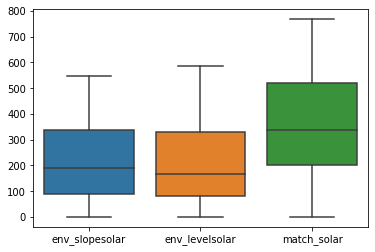

In [68]:
sns.boxplot(data = join_ent_other_del[["env_slopesolar", "env_levelsolar", "match_solar"]])

In [69]:
import scipy.stats

print(
    scipy.stats.pearsonr(join_ent_other_del["env_levelsolar"], join_ent_other_del["match_solar"]), 
    scipy.stats.pearsonr(join_ent_other_del["env_slopesolar"], join_ent_other_del["match_solar"]))
print("------------------")
print(
    scipy.stats.pearsonr(join_ent_other_del["env_levelsolar"], join_ent_other_del["watt"]), 
    scipy.stats.pearsonr(join_ent_other_del["env_slopesolar"], join_ent_other_del["watt"]), 
    scipy.stats.pearsonr(join_ent_other_del["match_solar"], join_ent_other_del["watt"]))

(0.7850558093157142, 2.7716252039490606e-106) (0.7838805766566043, 9.224408783508352e-106)
------------------
(0.9394487307248124, 3.665270746981531e-235) (0.9620830009257356, 7.800663069213207e-285) (0.7472715251670956, 5.672796297484232e-91)


In [70]:
import statsmodels.api as sm

Y = join_ent_other_del["watt"]
X = join_ent_other_del["env_slopesolar"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
# results.summary()

X2 = join_ent_other_del["match_solar"]
model2 = sm.OLS(Y,X2)
results1 = model2.fit()


print(results.summary())
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                   watt   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     6233.
Date:                Tue, 03 Nov 2020   Prob (F-statistic):          7.80e-285
Time:                        17:09:09   Log-Likelihood:                -3063.2
No. Observations:                 503   AIC:                             6130.
Df Residuals:                     501   BIC:                             6139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.1338      8.463     -0.

In [71]:

def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # print(np.mean(np.abs((y_true - y_pred) / y_true)))
    b = np.abs((y_true - y_pred) / y_true)

    # return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return b


# join_ent_other_set["env_slopeoslar"]
bb = join_ent_other_set[join_ent_other_del["env_slopesolar"] != 0 ]
bb = bb[bb["env_levelsolar"] != 0 ]
bb = bb[bb["match_solar"] != 0 ]
bb = bb[bb["일사"] != 0 ]

x = mean_absolute_percentage_error(bb["env_levelsolar"], bb["match_solar"])

xd = np.array(x)
np.percentile(xd, [0, 25, 50, 75, 100])

df = pd.DataFrame(sorted(xd))
df.quantile(0.75)


dfdf = df.iloc[1500:3500]

(dfdf.mean())
# df_set = df.loc[df.quantile(0.25):df.quantile(0.75)]
# sns.boxplot(data=x)
## X : 기업 일사량, Y : 공공 일사량
# join_ent_other_del["env_levelsolar"]
# join_ent_other_del["match_solar"]

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = join_ent_other_del["env_levelsolar"].to_numpy()
X_t = X.reshape(-1, 1)
Y = join_ent_other_del["match_solar"].to_numpy()
Y_t = Y.reshape(-1, 1)

X_0 = bb["env_levelsolar"].to_numpy()
X_t_0 = X_0.reshape(-1, 1)
Y_0 = bb["match_solar"].to_numpy()
Y_t_0 = Y_0.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X_t, Y_t, test_size = 0.25, shuffle=True, random_state = 42)
X_0_train, X_0_test, Y_0_train, Y_0_test = train_test_split(X_t_0, Y_t_0, test_size = 0.25, shuffle=True, random_state = 42)

X_t_0

my_model = LinearRegression()
my_model.fit(X_train,Y_train)
predY_in = my_model.predict(X_train)
predY_out = my_model.predict(X_test)

# print(predY_out)
## Y, predY_out 을 비교하면 공공일사량과, 기업일사량으로 표시한 공공일사량 확인 가능

## 먼저 mse
print("mse", metrics.mean_absolute_error(Y_test, predY_out))  ## inf 가 나온다, 왜? 중간에 0 값들이 껴있기 때문이라고 봄


## 다음 mape y_true : 공공일사량, y_pred : 기업일사량으로 표시한 공공일사량 
def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)


    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("mape", mean_absolute_percentage_error(Y_test, predY_out))

## 이것 또한 inf 가 나온다 0 값때문인 거 같다. 
## => 0 값을 제거한 값을 넣어 보자 ;

my_model_del0 = LinearRegression()
my_model_del0.fit(X_0_train, Y_0_train)
predY0_in = my_model.predict(X_0_train)
predY0_out = my_model.predict(X_0_test)

print("mse", metrics.mean_absolute_error(Y_0_test, predY0_out))
print("mape", mean_absolute_percentage_error(Y_0_test, predY0_out))

mse 94.37209985679668
mape 54.674946476004195
mse 89.45864932025422
mape 55.80702451772777


In [72]:
## 언제 match_solar와 env_levelsolar 가 차이가 많이 나는지를 봐보자 
diff = (((join_ent_other_del["env_levelsolar"] - join_ent_other_del["match_solar"])) / join_ent_other_del["match_solar"]) * 100
diff2 = (join_ent_other_del["env_levelsolar"] - join_ent_other_del["env_slopesolar"])
diff3 = diff + diff2 

join_ent_other_del["diff"] = diff
join_ent_other_del["diff2"] = diff2
join_ent_other_del["diff3"] = diff3

df_diff = join_ent_other_del[["env_levelsolar","env_slopesolar", "match_solar", "diff", "diff2", "diff3"]]
df_diff.describe()


df_diff[df_diff["diff"] == df_diff["diff"].max()]

df_diff[df_diff["match_solar"] == 0]


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df_diff.index, y=df_diff["env_levelsolar"], mode='lines', name="기업", line=dict(color='blue')), secondary_y = False)
fig.add_trace(go.Scatter(x=df_diff.index, y=df_diff["match_solar"], mode='lines', name="기상청", line=dict(color='red')), secondary_y = True)
fig.update_layout(width=1000, height=300,)
fig.show()

df_diff.describe()

#  2020 10 10 16:00
# 발전소 센서 가끔 다운, 오작동 -> 소거 
# 1주일 별 시간 별 평균 평균 ,,
 
# 10: 14
print(mean_absolute_percentage_error(bb["env_levelsolar"], bb["match_solar"]))

171.77612985030325
